In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

In [95]:
platforms = ['cirrus', 'somerville', 'csd3']
storages = ['hdd', 'ssd']
methods = ['inmem', 'streaming']
platform = platforms[2]
storage = storages[0]
method = methods[1]
# base_path = f'{os.environ["HOME"]}/{platform}-ral-dummy-test/{storage}/{method}'
base_path = f'{os.environ["HOME"]}/csd3_wide_comp-vs-nocomp'

In [96]:
path = glob.glob(base_path+'/*.csv')[0]
path

'/home/dave/csd3_wide_comp-vs-nocomp/butler_wide_20220930-lsst-backup.csv'

In [97]:
df = pd.read_csv(path).drop(columns=['LOCAL_FOLDER', 'DESTINATION_KEY', 'CHECKSUM'])
df

,LOCAL_PATH,FILE_SIZE,BUCKET_NAME,ZIP_CONTENTS,FILES_PER_ZIP,UPLOAD_TIME,UPLOAD_START,UPLOAD_END
0,collated_436.zip,406322,LSST-IR-FUSION-Butlers-wide-comp,butler_wide_20220930/data/u/ir-shir1/DRP/vhsMu...,406,0.066638,2025-10-07 07:18:43.778950,2025-10-07 07:18:43.845588
1,collated_312.zip,413656,LSST-IR-FUSION-Butlers-wide-comp,butler_wide_20220930/data/u/ir-shir1/DRP/vhsMu...,406,0.100906,2025-10-07 07:18:43.773114,2025-10-07 07:18:43.874020
2,collated_2000335.zip,1173227390,LSST-IR-FUSION-Butlers-wide-comp,butler_wide_20220930/data/u/ir-shir1/DRP/vhsMu...,20,13.629024,2025-10-07 07:20:35.317022,2025-10-07 07:20:48.946046
3,collated_2000484.zip,1135959142,LSST-IR-FUSION-Butlers-wide-comp,butler_wide_20220930/data/u/ir-shir1/DRP/vhsMu...,30,13.463605,2025-10-07 07:20:35.597216,2025-10-07 07:20:49.060821
4,collated_1000951.zip,1194657895,LSST-IR-FUSION-Butlers-wide-comp,butler_wide_20220930/data/u/ir-shir1/DRP/vhsMu...,30,11.051817,2025-10-07 07:20:38.336700,2025-10-07 07:20:49.388517
...,...,...,...,...,...,...,...,...
21085,collated_77000679.zip,4272132426,LSST-IR-FUSION-Butlers-wide-nocomp,butler_wide_20220930/data/u/ir-shir1/DRP/vhsSi...,143,46.712379,2025-10-08 09:43:01.952348,2025-10-08 09:43:48.664727
21086,collated_77000548.zip,4280852124,LSST-IR-FUSION-Butlers-wide-nocomp,butler_wide_20220930/data/u/ir-shir1/DRP/vhsSi...,141,50.039529,2025-10-08 09:42:59.211808,2025-10-08 09:43:49.251337
21087,collated_78000152.zip,4272751146,LSST-IR-FUSION-Butlers-wide-nocomp,butler_wide_20220930/data/u/ir-shir1/DRP/vhsSi...,142,46.871087,2025-10-08 09:43:02.990353,2025-10-08 09:43:49.861440
21088,collated_78000028.zip,4265696028,LSST-IR-FUSION-Butlers-wide-nocomp,butler_wide_20220930/data/u/ir-shir1/DRP/vhsSi...,144,48.890170,2025-10-08 09:43:02.274582,2025-10-08 09:43:51.164752


In [98]:
df['FILES_PER_ZIP'] = df['FILES_PER_ZIP'].fillna(0).astype(int)
df

,LOCAL_PATH,FILE_SIZE,BUCKET_NAME,ZIP_CONTENTS,FILES_PER_ZIP,UPLOAD_TIME,UPLOAD_START,UPLOAD_END
0,collated_436.zip,406322,LSST-IR-FUSION-Butlers-wide-comp,butler_wide_20220930/data/u/ir-shir1/DRP/vhsMu...,406,0.066638,2025-10-07 07:18:43.778950,2025-10-07 07:18:43.845588
1,collated_312.zip,413656,LSST-IR-FUSION-Butlers-wide-comp,butler_wide_20220930/data/u/ir-shir1/DRP/vhsMu...,406,0.100906,2025-10-07 07:18:43.773114,2025-10-07 07:18:43.874020
2,collated_2000335.zip,1173227390,LSST-IR-FUSION-Butlers-wide-comp,butler_wide_20220930/data/u/ir-shir1/DRP/vhsMu...,20,13.629024,2025-10-07 07:20:35.317022,2025-10-07 07:20:48.946046
3,collated_2000484.zip,1135959142,LSST-IR-FUSION-Butlers-wide-comp,butler_wide_20220930/data/u/ir-shir1/DRP/vhsMu...,30,13.463605,2025-10-07 07:20:35.597216,2025-10-07 07:20:49.060821
4,collated_1000951.zip,1194657895,LSST-IR-FUSION-Butlers-wide-comp,butler_wide_20220930/data/u/ir-shir1/DRP/vhsMu...,30,11.051817,2025-10-07 07:20:38.336700,2025-10-07 07:20:49.388517
...,...,...,...,...,...,...,...,...
21085,collated_77000679.zip,4272132426,LSST-IR-FUSION-Butlers-wide-nocomp,butler_wide_20220930/data/u/ir-shir1/DRP/vhsSi...,143,46.712379,2025-10-08 09:43:01.952348,2025-10-08 09:43:48.664727
21086,collated_77000548.zip,4280852124,LSST-IR-FUSION-Butlers-wide-nocomp,butler_wide_20220930/data/u/ir-shir1/DRP/vhsSi...,141,50.039529,2025-10-08 09:42:59.211808,2025-10-08 09:43:49.251337
21087,collated_78000152.zip,4272751146,LSST-IR-FUSION-Butlers-wide-nocomp,butler_wide_20220930/data/u/ir-shir1/DRP/vhsSi...,142,46.871087,2025-10-08 09:43:02.990353,2025-10-08 09:43:49.861440
21088,collated_78000028.zip,4265696028,LSST-IR-FUSION-Butlers-wide-nocomp,butler_wide_20220930/data/u/ir-shir1/DRP/vhsSi...,144,48.890170,2025-10-08 09:43:02.274582,2025-10-08 09:43:51.164752


In [99]:
df['FILES_PER_ZIP'] = df['FILES_PER_ZIP'].astype('Int64')
df['UPLOAD_END'] = pd.to_datetime(df['UPLOAD_END'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')
df['UPLOAD_START'] = pd.to_datetime(df['UPLOAD_START'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')
df['FILE_SIZE'] = df['FILE_SIZE'].astype('Int64')
df = df.dropna(subset=['UPLOAD_END', 'UPLOAD_START', 'FILE_SIZE'])
df

,LOCAL_PATH,FILE_SIZE,BUCKET_NAME,ZIP_CONTENTS,FILES_PER_ZIP,UPLOAD_TIME,UPLOAD_START,UPLOAD_END
0,collated_436.zip,406322,LSST-IR-FUSION-Butlers-wide-comp,butler_wide_20220930/data/u/ir-shir1/DRP/vhsMu...,406,0.066638,2025-10-07 07:18:43.778950,2025-10-07 07:18:43.845588
1,collated_312.zip,413656,LSST-IR-FUSION-Butlers-wide-comp,butler_wide_20220930/data/u/ir-shir1/DRP/vhsMu...,406,0.100906,2025-10-07 07:18:43.773114,2025-10-07 07:18:43.874020
2,collated_2000335.zip,1173227390,LSST-IR-FUSION-Butlers-wide-comp,butler_wide_20220930/data/u/ir-shir1/DRP/vhsMu...,20,13.629024,2025-10-07 07:20:35.317022,2025-10-07 07:20:48.946046
3,collated_2000484.zip,1135959142,LSST-IR-FUSION-Butlers-wide-comp,butler_wide_20220930/data/u/ir-shir1/DRP/vhsMu...,30,13.463605,2025-10-07 07:20:35.597216,2025-10-07 07:20:49.060821
4,collated_1000951.zip,1194657895,LSST-IR-FUSION-Butlers-wide-comp,butler_wide_20220930/data/u/ir-shir1/DRP/vhsMu...,30,11.051817,2025-10-07 07:20:38.336700,2025-10-07 07:20:49.388517
...,...,...,...,...,...,...,...,...
21085,collated_77000679.zip,4272132426,LSST-IR-FUSION-Butlers-wide-nocomp,butler_wide_20220930/data/u/ir-shir1/DRP/vhsSi...,143,46.712379,2025-10-08 09:43:01.952348,2025-10-08 09:43:48.664727
21086,collated_77000548.zip,4280852124,LSST-IR-FUSION-Butlers-wide-nocomp,butler_wide_20220930/data/u/ir-shir1/DRP/vhsSi...,141,50.039529,2025-10-08 09:42:59.211808,2025-10-08 09:43:49.251337
21087,collated_78000152.zip,4272751146,LSST-IR-FUSION-Butlers-wide-nocomp,butler_wide_20220930/data/u/ir-shir1/DRP/vhsSi...,142,46.871087,2025-10-08 09:43:02.990353,2025-10-08 09:43:49.861440
21088,collated_78000028.zip,4265696028,LSST-IR-FUSION-Butlers-wide-nocomp,butler_wide_20220930/data/u/ir-shir1/DRP/vhsSi...,144,48.890170,2025-10-08 09:43:02.274582,2025-10-08 09:43:51.164752


In [100]:
df['OVERLAP'] = df['UPLOAD_END'].shift(1) > df['UPLOAD_START']
df[df['OVERLAP'] == False]

,LOCAL_PATH,FILE_SIZE,BUCKET_NAME,ZIP_CONTENTS,FILES_PER_ZIP,UPLOAD_TIME,UPLOAD_START,UPLOAD_END,OVERLAP
0,collated_436.zip,406322,LSST-IR-FUSION-Butlers-wide-comp,butler_wide_20220930/data/u/ir-shir1/DRP/vhsMu...,406,0.066638,2025-10-07 07:18:43.778950,2025-10-07 07:18:43.845588,False
2,collated_2000335.zip,1173227390,LSST-IR-FUSION-Butlers-wide-comp,butler_wide_20220930/data/u/ir-shir1/DRP/vhsMu...,20,13.629024,2025-10-07 07:20:35.317022,2025-10-07 07:20:48.946046,False
23,collated_3000004.zip,442889,LSST-IR-FUSION-Butlers-wide-comp,butler_wide_20220930/data/u/ir-shir1/DRP/vhsMu...,406,0.104309,2025-10-07 07:21:34.439151,2025-10-07 07:21:34.543460,False
24,collated_2001042.zip,1128225803,LSST-IR-FUSION-Butlers-wide-comp,butler_wide_20220930/data/u/ir-shir1/DRP/vhsMu...,27,7.911550,2025-10-07 07:22:49.642715,2025-10-07 07:22:57.554265,False
39,collated_4000016.zip,521717,LSST-IR-FUSION-Butlers-wide-comp,butler_wide_20220930/data/u/ir-shir1/DRP/vhsMu...,406,0.089510,2025-10-07 07:23:22.410159,2025-10-07 07:23:22.499669,False
...,...,...,...,...,...,...,...,...,...
21061,collated_77000005.zip,905449,LSST-IR-FUSION-Butlers-wide-nocomp,butler_wide_20220930/data/u/ir-shir1/DRP/vhsSi...,406,0.096829,2025-10-08 09:42:19.955839,2025-10-08 09:42:20.052668,False
21062,collated_75000191.zip,262377721,LSST-IR-FUSION-Butlers-wide-nocomp,butler_wide_20220930/data/u/ir-shir1/DRP/vhsSi...,406,2.375585,2025-10-08 09:42:23.383388,2025-10-08 09:42:25.758973,False
21064,collated_79000164.zip,97178034,LSST-IR-FUSION-Butlers-wide-nocomp,butler_wide_20220930/data/u/ir-shir1/DRP/vhsSi...,406,1.001839,2025-10-08 09:42:46.529450,2025-10-08 09:42:47.531289,False
21065,collated_79000225.zip,115796912,LSST-IR-FUSION-Butlers-wide-nocomp,butler_wide_20220930/data/u/ir-shir1/DRP/vhsSi...,406,1.075263,2025-10-08 09:43:05.854178,2025-10-08 09:43:06.929441,False


In [101]:
df[df['OVERLAP'] == True]

,LOCAL_PATH,FILE_SIZE,BUCKET_NAME,ZIP_CONTENTS,FILES_PER_ZIP,UPLOAD_TIME,UPLOAD_START,UPLOAD_END,OVERLAP
1,collated_312.zip,413656,LSST-IR-FUSION-Butlers-wide-comp,butler_wide_20220930/data/u/ir-shir1/DRP/vhsMu...,406,0.100906,2025-10-07 07:18:43.773114,2025-10-07 07:18:43.874020,True
3,collated_2000484.zip,1135959142,LSST-IR-FUSION-Butlers-wide-comp,butler_wide_20220930/data/u/ir-shir1/DRP/vhsMu...,30,13.463605,2025-10-07 07:20:35.597216,2025-10-07 07:20:49.060821,True
4,collated_1000951.zip,1194657895,LSST-IR-FUSION-Butlers-wide-comp,butler_wide_20220930/data/u/ir-shir1/DRP/vhsMu...,30,11.051817,2025-10-07 07:20:38.336700,2025-10-07 07:20:49.388517,True
5,collated_1001173.zip,1158726170,LSST-IR-FUSION-Butlers-wide-comp,butler_wide_20220930/data/u/ir-shir1/DRP/vhsMu...,24,10.191589,2025-10-07 07:20:39.257658,2025-10-07 07:20:49.449247,True
6,collated_2000266.zip,1141165664,LSST-IR-FUSION-Butlers-wide-comp,butler_wide_20220930/data/u/ir-shir1/DRP/vhsMu...,27,13.966077,2025-10-07 07:20:41.890239,2025-10-07 07:20:55.856316,True
...,...,...,...,...,...,...,...,...,...
21085,collated_77000679.zip,4272132426,LSST-IR-FUSION-Butlers-wide-nocomp,butler_wide_20220930/data/u/ir-shir1/DRP/vhsSi...,143,46.712379,2025-10-08 09:43:01.952348,2025-10-08 09:43:48.664727,True
21086,collated_77000548.zip,4280852124,LSST-IR-FUSION-Butlers-wide-nocomp,butler_wide_20220930/data/u/ir-shir1/DRP/vhsSi...,141,50.039529,2025-10-08 09:42:59.211808,2025-10-08 09:43:49.251337,True
21087,collated_78000152.zip,4272751146,LSST-IR-FUSION-Butlers-wide-nocomp,butler_wide_20220930/data/u/ir-shir1/DRP/vhsSi...,142,46.871087,2025-10-08 09:43:02.990353,2025-10-08 09:43:49.861440,True
21088,collated_78000028.zip,4265696028,LSST-IR-FUSION-Butlers-wide-nocomp,butler_wide_20220930/data/u/ir-shir1/DRP/vhsSi...,144,48.890170,2025-10-08 09:43:02.274582,2025-10-08 09:43:51.164752,True


In [102]:
df = df.drop(columns=['ZIP_CONTENTS'])

In [103]:
print(f'Instances of overlap: {df["OVERLAP"].sum()} vs instanses of no overlap: {(~df["OVERLAP"]).sum()}')

Instances of overlap: 17849 vs instanses of no overlap: 3241


In [104]:
df['TYPE'] = df['LOCAL_PATH'].apply(lambda x: 'zip' if x.endswith('.zip') else 'file')
df.drop(columns=['LOCAL_PATH'], inplace=True)
df

,FILE_SIZE,BUCKET_NAME,FILES_PER_ZIP,UPLOAD_TIME,UPLOAD_START,UPLOAD_END,OVERLAP,TYPE
0,406322,LSST-IR-FUSION-Butlers-wide-comp,406,0.066638,2025-10-07 07:18:43.778950,2025-10-07 07:18:43.845588,False,zip
1,413656,LSST-IR-FUSION-Butlers-wide-comp,406,0.100906,2025-10-07 07:18:43.773114,2025-10-07 07:18:43.874020,True,zip
2,1173227390,LSST-IR-FUSION-Butlers-wide-comp,20,13.629024,2025-10-07 07:20:35.317022,2025-10-07 07:20:48.946046,False,zip
3,1135959142,LSST-IR-FUSION-Butlers-wide-comp,30,13.463605,2025-10-07 07:20:35.597216,2025-10-07 07:20:49.060821,True,zip
4,1194657895,LSST-IR-FUSION-Butlers-wide-comp,30,11.051817,2025-10-07 07:20:38.336700,2025-10-07 07:20:49.388517,True,zip
...,...,...,...,...,...,...,...,...
21085,4272132426,LSST-IR-FUSION-Butlers-wide-nocomp,143,46.712379,2025-10-08 09:43:01.952348,2025-10-08 09:43:48.664727,True,zip
21086,4280852124,LSST-IR-FUSION-Butlers-wide-nocomp,141,50.039529,2025-10-08 09:42:59.211808,2025-10-08 09:43:49.251337,True,zip
21087,4272751146,LSST-IR-FUSION-Butlers-wide-nocomp,142,46.871087,2025-10-08 09:43:02.990353,2025-10-08 09:43:49.861440,True,zip
21088,4265696028,LSST-IR-FUSION-Butlers-wide-nocomp,144,48.890170,2025-10-08 09:43:02.274582,2025-10-08 09:43:51.164752,True,zip


In [105]:
df['COMPRESSION_USED'] = df.apply(lambda row: True if row['BUCKET_NAME'] == 'LSST-IR-FUSION-Butlers-wide-comp' and row['TYPE'] == 'zip' else False, axis=1)
df

,FILE_SIZE,BUCKET_NAME,FILES_PER_ZIP,UPLOAD_TIME,UPLOAD_START,UPLOAD_END,OVERLAP,TYPE,COMPRESSION_USED
0,406322,LSST-IR-FUSION-Butlers-wide-comp,406,0.066638,2025-10-07 07:18:43.778950,2025-10-07 07:18:43.845588,False,zip,True
1,413656,LSST-IR-FUSION-Butlers-wide-comp,406,0.100906,2025-10-07 07:18:43.773114,2025-10-07 07:18:43.874020,True,zip,True
2,1173227390,LSST-IR-FUSION-Butlers-wide-comp,20,13.629024,2025-10-07 07:20:35.317022,2025-10-07 07:20:48.946046,False,zip,True
3,1135959142,LSST-IR-FUSION-Butlers-wide-comp,30,13.463605,2025-10-07 07:20:35.597216,2025-10-07 07:20:49.060821,True,zip,True
4,1194657895,LSST-IR-FUSION-Butlers-wide-comp,30,11.051817,2025-10-07 07:20:38.336700,2025-10-07 07:20:49.388517,True,zip,True
...,...,...,...,...,...,...,...,...,...
21085,4272132426,LSST-IR-FUSION-Butlers-wide-nocomp,143,46.712379,2025-10-08 09:43:01.952348,2025-10-08 09:43:48.664727,True,zip,False
21086,4280852124,LSST-IR-FUSION-Butlers-wide-nocomp,141,50.039529,2025-10-08 09:42:59.211808,2025-10-08 09:43:49.251337,True,zip,False
21087,4272751146,LSST-IR-FUSION-Butlers-wide-nocomp,142,46.871087,2025-10-08 09:43:02.990353,2025-10-08 09:43:49.861440,True,zip,False
21088,4265696028,LSST-IR-FUSION-Butlers-wide-nocomp,144,48.890170,2025-10-08 09:43:02.274582,2025-10-08 09:43:51.164752,True,zip,False


In [106]:
len(df[df['TYPE'] == 'zip']), len(df[df['TYPE'] == 'file'])

(21090, 0)

In [107]:
df['FILE_SIZE'].sum() / 1024**3

62294.835661594756

In [108]:
zip_upload_time = df[df['TYPE'] == 'zip']['UPLOAD_TIME'].sum()
zip_upload_time

841948.108502

In [109]:
print(f"Total upload time for zip files: {df[df['TYPE'] == 'zip']['UPLOAD_TIME'].sum():.0f} seconds")
print(f"Average upload time for zip files: {df[df['TYPE'] == 'zip']['UPLOAD_TIME'].mean():.2f} seconds")
print(f"Avergage number of files per zip: {df[df['TYPE'] == 'zip']['FILES_PER_ZIP'].mean():.2f}")
print(f"Total files in zips: {df[df['TYPE'] == 'zip']['FILES_PER_ZIP'].sum():.0f}")
print(f"Average upload time per file in zips: {zip_upload_time / df[df['TYPE'] == 'zip']['FILES_PER_ZIP'].sum():.2f} seconds")
print(f"Total upload time for file uploads: {df[df['TYPE'] == 'file']['UPLOAD_TIME'].sum():.0f} seconds")
print(f"Average upload time for file uploads: {df[df['TYPE'] == 'file']['UPLOAD_TIME'].mean():.2f} seconds")
print(f"Total upload time: {df['UPLOAD_TIME'].sum():.0f} seconds")
print(f"Average upload time: {df['UPLOAD_TIME'].mean():.2f} seconds")

Total upload time for zip files: 841948 seconds
Average upload time for zip files: 39.92 seconds
Avergage number of files per zip: 117.03
Total files in zips: 2468165
Average upload time per file in zips: 0.34 seconds
Total upload time for file uploads: 0 seconds
Average upload time for file uploads: nan seconds
Total upload time: 841948 seconds
Average upload time: 39.92 seconds


In [110]:
zip_total_size = df[df['TYPE'] == 'zip']['FILE_SIZE'].sum()
zip_total_size / (1024 * 1024 * 1024)

62294.835661594756

In [111]:
file_total_size = df[df['TYPE'] == 'file']['FILE_SIZE'].sum()
file_total_size / (1024 * 1024 * 1024)

0.0

In [112]:
print(f"Zip file size stats (MB):")
print(df[df['TYPE'] == 'zip']['FILE_SIZE'].describe() / (1024 * 1024))

Zip file size stats (MB):
count       0.020113
mean     3024.652049
std      1590.481306
min         0.005876
25%      1219.346566
50%      3961.267917
75%       4050.70078
max      4096.065191
Name: FILE_SIZE, dtype: Float64


In [113]:
print(f"File size stats (MB):")
print(df[df['TYPE'] == 'file']['FILE_SIZE'].describe() / (1024 * 1024))

File size stats (MB):
count     0.0
mean     <NA>
std      <NA>
min      <NA>
25%      <NA>
50%      <NA>
75%      <NA>
max      <NA>
Name: FILE_SIZE, dtype: Float64


In [114]:
df['TRANSFER_RATE'] = (df['FILE_SIZE'] * 8) / 1024**3 / df['UPLOAD_TIME']
print(f"Transfer rate stats (Gb/s):")
df['TRANSFER_RATE'].describe()

Transfer rate stats (Gb/s):


count     21090.0
mean     0.646394
std      0.330408
min      0.000658
25%      0.410948
50%      0.658032
75%      0.863324
max      1.468576
Name: TRANSFER_RATE, dtype: Float64

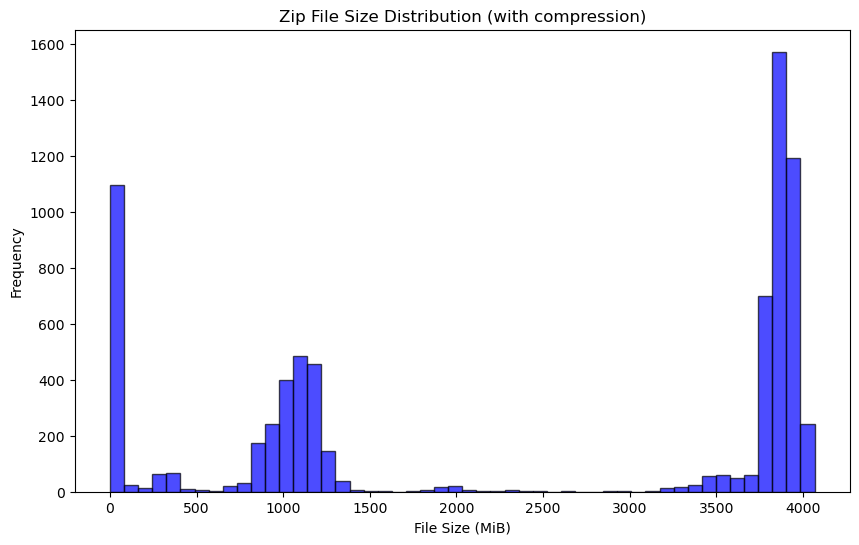

In [140]:
plt.figure(figsize=(10, 6))
plt.hist(df[df['TYPE'] == 'zip'][df['COMPRESSION_USED']]['FILE_SIZE']/1024**2, bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('Zip File Size Distribution (with compression)')
plt.xlabel('File Size (MiB)')
plt.ylabel('Frequency')
# plt.xlim(0, 10)
# plt.ylim(0, 200)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

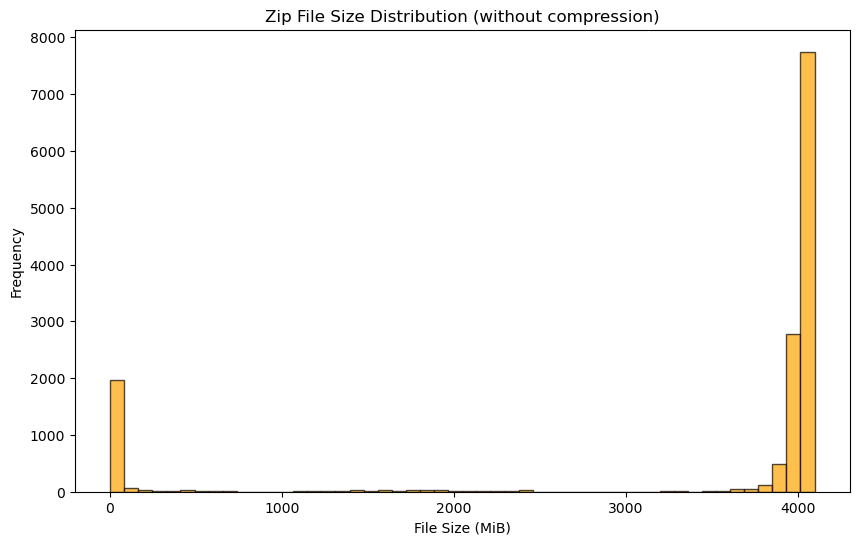

In [139]:
plt.figure(figsize=(10, 6))
plt.hist(df[df['TYPE'] == 'zip'][~df['COMPRESSION_USED']]['FILE_SIZE']/1024**2, bins=50, color='orange', alpha=0.7, edgecolor='black')
plt.title('Zip File Size Distribution (without compression)')
plt.xlabel('File Size (MiB)')
plt.ylabel('Frequency')
# plt.xlim(0, 10)
# plt.ylim(0, 200)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

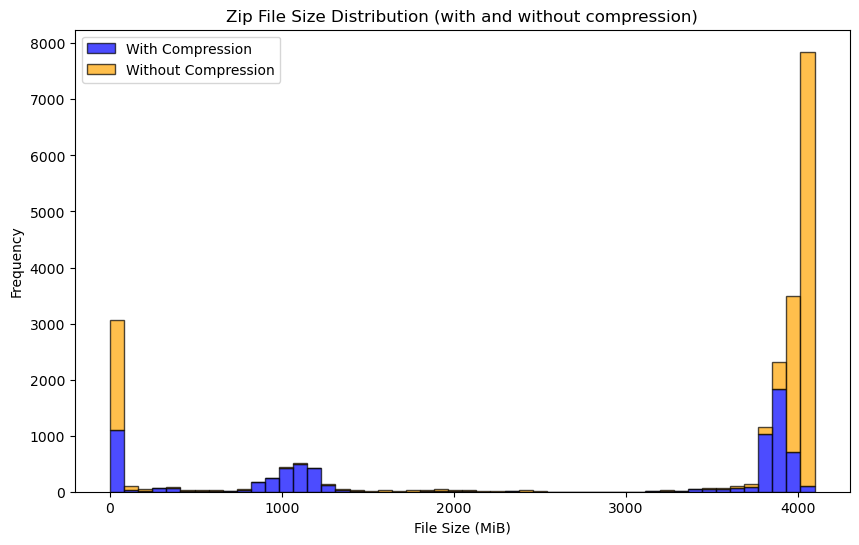

In [141]:
plt.figure(figsize=(10, 6))

# Prepare the data for the stacked histogram
comp_sizes = df[(df['TYPE'] == 'zip') & (df['COMPRESSION_USED'])]['FILE_SIZE'] / 1024**2
nocomp_sizes = df[(df['TYPE'] == 'zip') & (~df['COMPRESSION_USED'])]['FILE_SIZE'] / 1024**2

# Plot the stacked histogram
plt.hist([comp_sizes, nocomp_sizes], 
         bins=50, 
         color=['blue', 'orange'], 
         alpha=0.7, 
         edgecolor='black',
         stacked=True, 
         label=['With Compression', 'Without Compression'])

plt.title('Zip File Size Distribution (with and without compression)')
plt.xlabel('File Size (MiB)')
plt.ylabel('Frequency')
plt.legend()
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

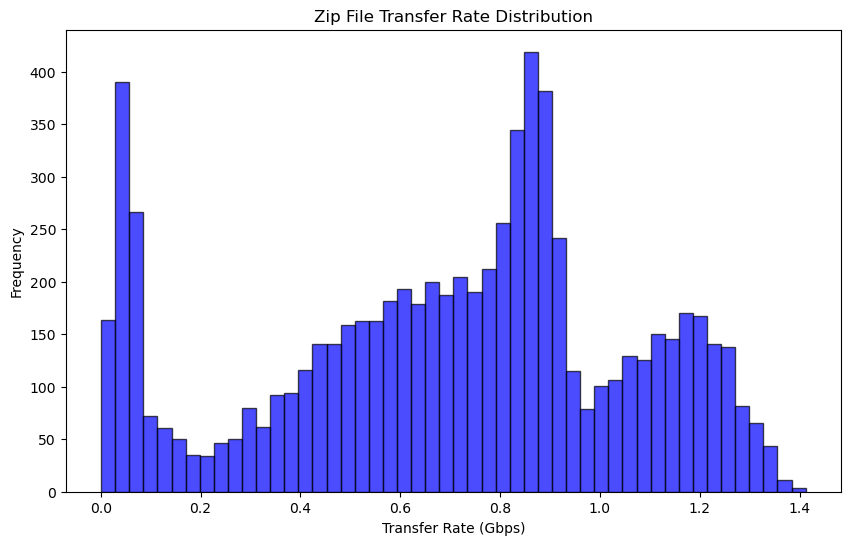

In [117]:
plt.figure(figsize=(10, 6))
plt.hist(df[df['TYPE'] == 'zip'][df['COMPRESSION_USED']]['TRANSFER_RATE'], bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('Zip File Transfer Rate Distribution')
plt.xlabel('Transfer Rate (Gbps)')
plt.ylabel('Frequency')
# plt.xlim(0, 10)
# plt.ylim(0, 200)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

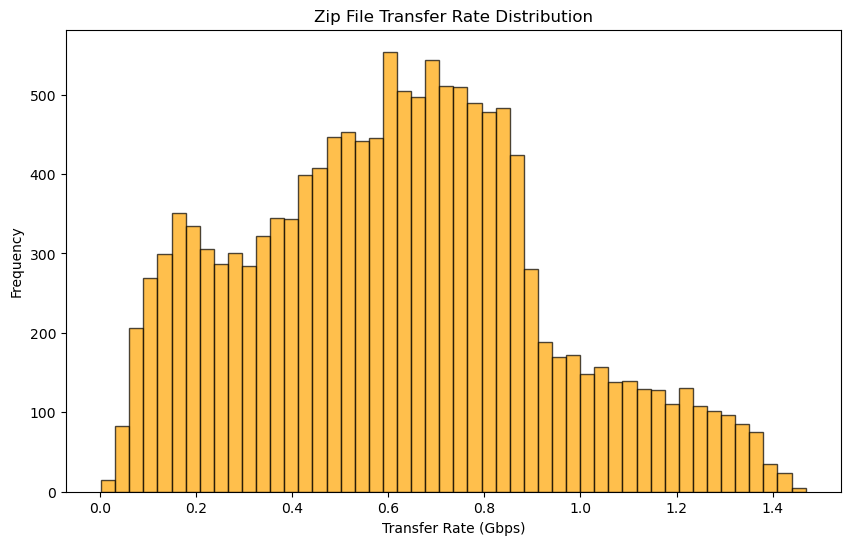

In [118]:
plt.figure(figsize=(10, 6))
plt.hist(df[df['TYPE'] == 'zip'][~df['COMPRESSION_USED']]['TRANSFER_RATE'], bins=50, color='orange', alpha=0.7, edgecolor='black')
plt.title('Zip File Transfer Rate Distribution')
plt.xlabel('Transfer Rate (Gbps)')
plt.ylabel('Frequency')
# plt.xlim(0, 10)
# plt.ylim(0, 200)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

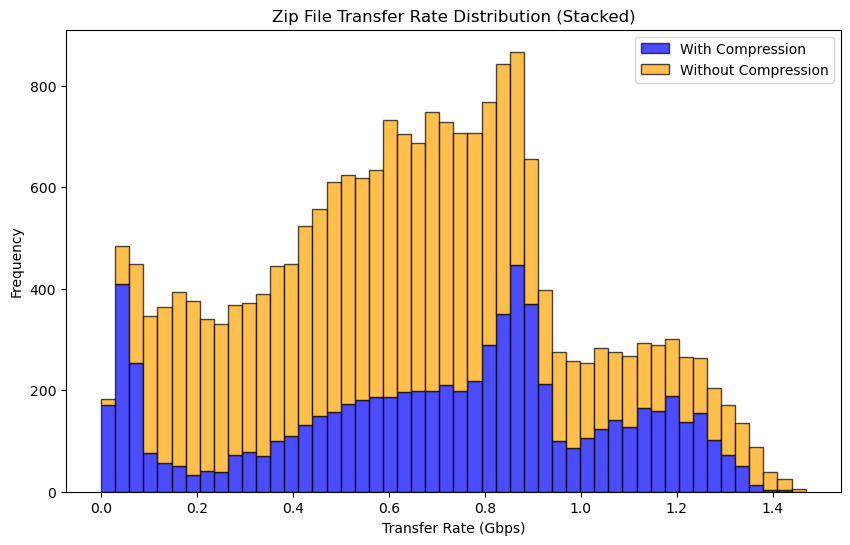

In [119]:
plt.figure(figsize=(10, 6))

# Prepare the data for the stacked histogram
comp_rates = df[(df['TYPE'] == 'zip') & (df['COMPRESSION_USED'])]['TRANSFER_RATE']
nocomp_rates = df[(df['TYPE'] == 'zip') & (~df['COMPRESSION_USED'])]['TRANSFER_RATE']

# Plot the stacked histogram
plt.hist([comp_rates, nocomp_rates], 
         bins=50, 
         color=['blue', 'orange'], 
         alpha=0.7, 
         edgecolor='black',
         stacked=True, 
         label=['With Compression', 'Without Compression'])

plt.title('Zip File Transfer Rate Distribution (Stacked)')
plt.xlabel('Transfer Rate (Gbps)')
plt.ylabel('Frequency')
plt.legend()
# plt.xlim(0, 10)
# plt.ylim(0, 200)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

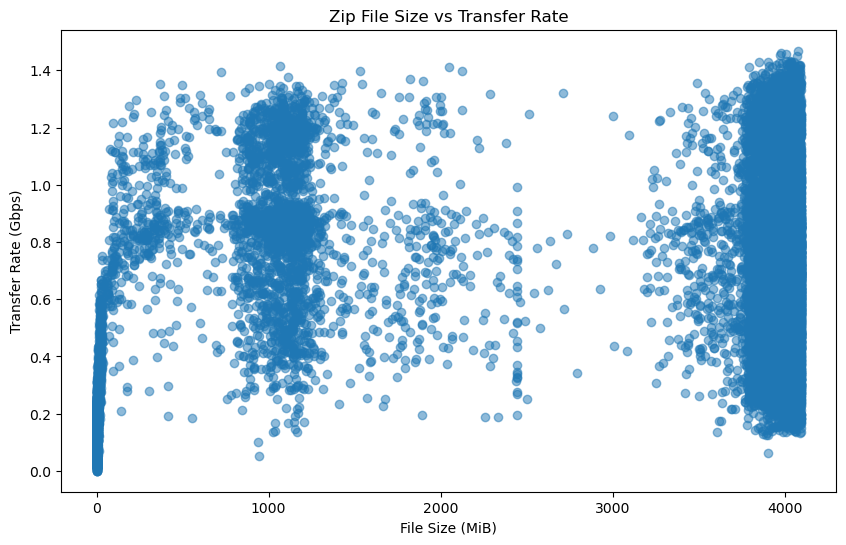

In [120]:
plt.figure(figsize=(10, 6))
plt.scatter(df[df['TYPE'] == 'zip']['FILE_SIZE'] / 1024**2, df[df['TYPE'] == 'zip']['TRANSFER_RATE'], alpha=0.5)
plt.title('Zip File Size vs Transfer Rate')
# plt.xlim(0,3000)
# plt.ylim(0, 15)
plt.xlabel('File Size (MiB)')
plt.ylabel('Transfer Rate (Gbps)')
plt.show()

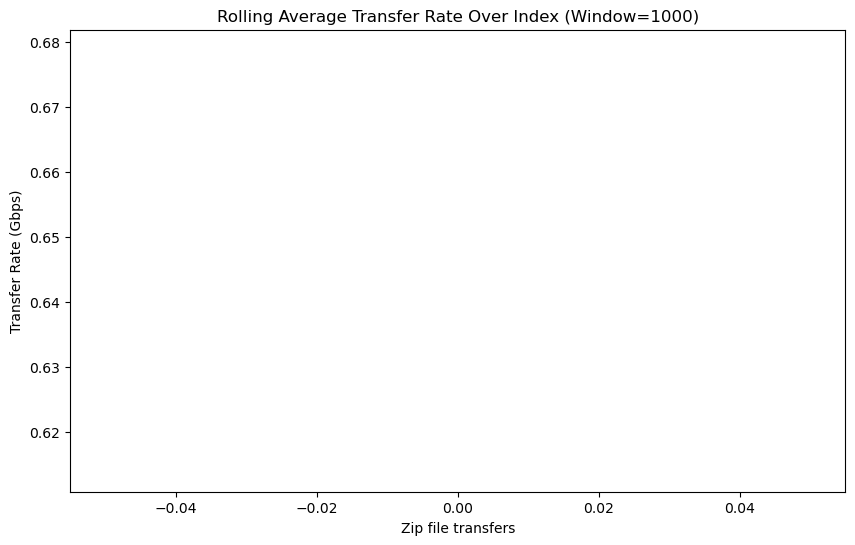

In [121]:
# Calculate the rolling average of the transfer rate over a window of 100
rolling_avg = df[df['TYPE'] == 'zip']['TRANSFER_RATE'].mean()

# Plotting the rolling average transfer rate over the index
plt.figure(figsize=(10, 6))
plt.plot(rolling_avg)
plt.title('Rolling Average Transfer Rate Over Index (Window=1000)')
# plt.xlim(0,3000)
# plt.ylim(0, 15)
plt.xlabel('Zip file transfers')
plt.ylabel('Transfer Rate (Gbps)')
plt.show()

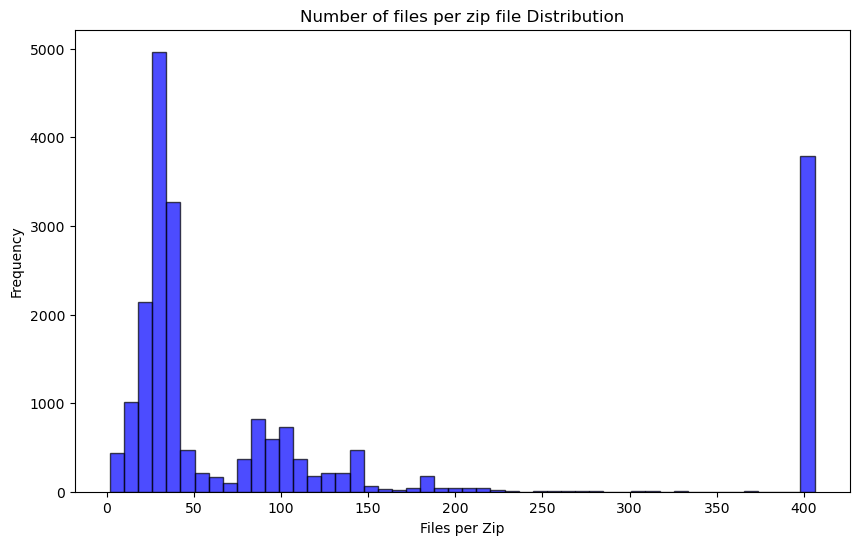

In [122]:
plt.figure(figsize=(10, 6))
plt.hist(df[df['TYPE'] == 'zip']['FILES_PER_ZIP'], bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('Number of files per zip file Distribution')
plt.xlabel('Files per Zip')
plt.ylabel('Frequency')
# plt.xlim(0, 10)
# plt.ylim(0, 200)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

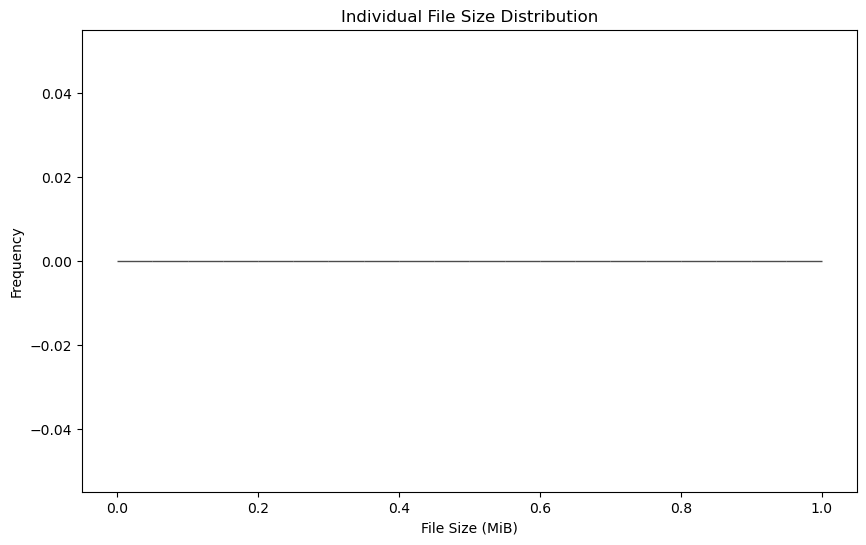

In [123]:
plt.figure(figsize=(10, 6))
plt.hist(df[df['TYPE'] == 'file']['FILE_SIZE']/1024**2, bins=20, color='blue', alpha=0.7, edgecolor='black')
plt.title('Individual File Size Distribution')
plt.xlabel('File Size (MiB)')
plt.ylabel('Frequency')
# plt.xlim(0, 10)
# plt.ylim(0, 200)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

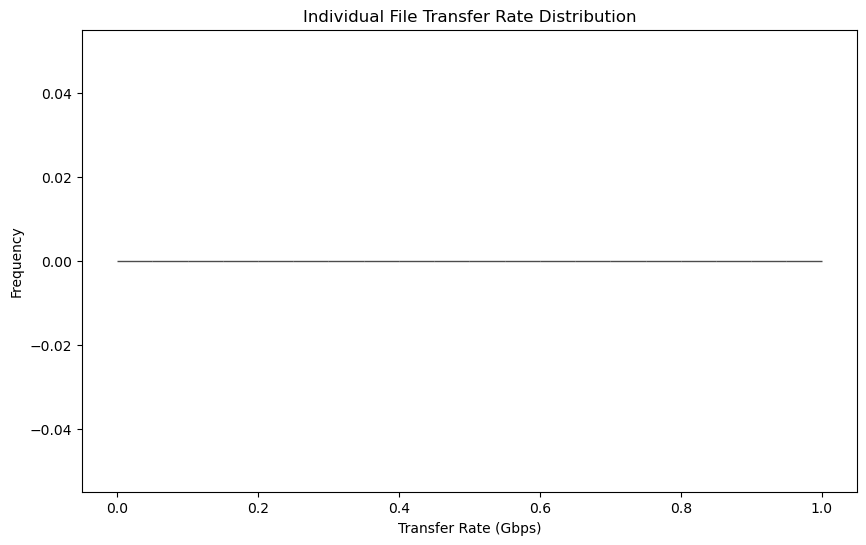

In [124]:
plt.figure(figsize=(10, 6))
plt.hist(df[df['TYPE'] == 'file']['TRANSFER_RATE'], bins=20, color='blue', alpha=0.7, edgecolor='black')
plt.title('Individual File Transfer Rate Distribution')
plt.xlabel('Transfer Rate (Gbps)')
plt.ylabel('Frequency')
# plt.xlim(0, 10)
# plt.ylim(0, 200)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

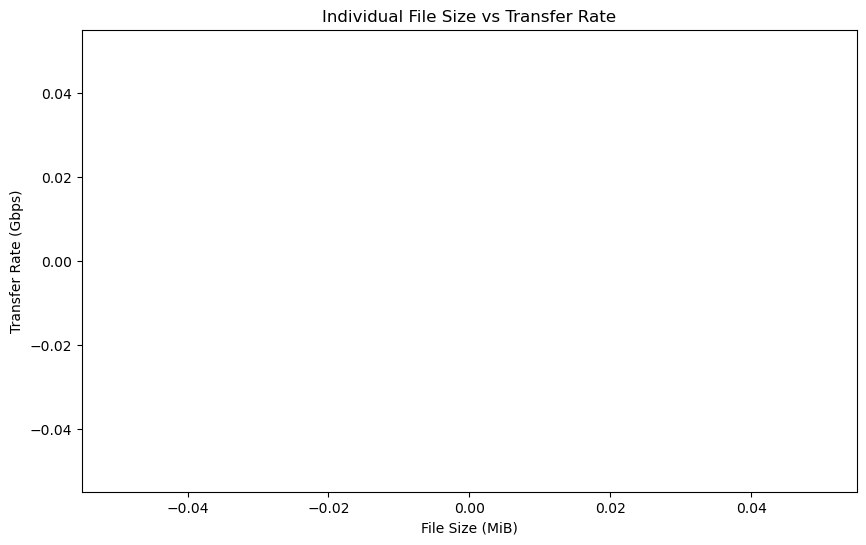

In [125]:
plt.figure(figsize=(10, 6))
plt.scatter(df[df['TYPE'] == 'file']['FILE_SIZE'] / 1024**2, df[df['TYPE'] == 'file']['TRANSFER_RATE'], alpha=0.5)
plt.title('Individual File Size vs Transfer Rate')
# plt.xlim(0,3000)
# plt.ylim(0, 15)
plt.xlabel('File Size (MiB)')
plt.ylabel('Transfer Rate (Gbps)')
plt.show()

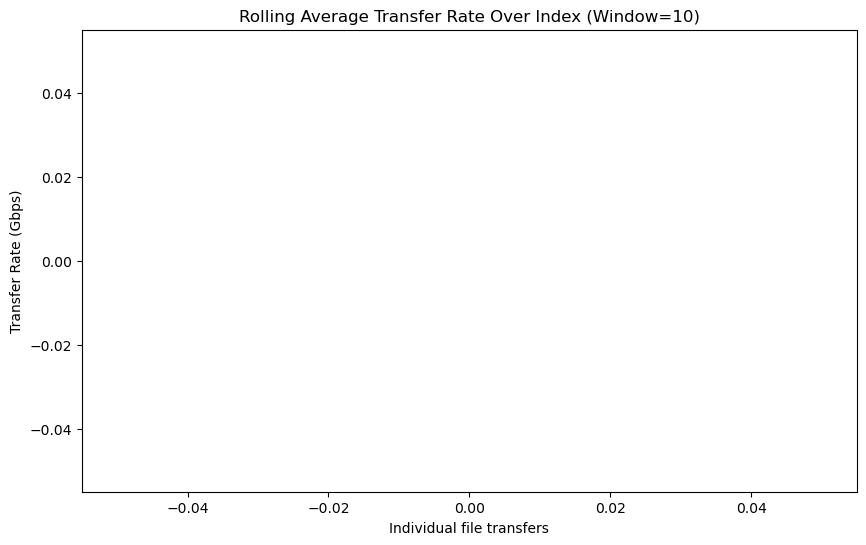

In [126]:
# Calculate the rolling average of the transfer rate over a window of 100
rolling_avg = df[df['TYPE'] == 'file']['TRANSFER_RATE'].rolling(window=10).mean()

# Plotting the rolling average transfer rate over the index
plt.figure(figsize=(10, 6))
plt.plot(rolling_avg)
plt.title('Rolling Average Transfer Rate Over Index (Window=10)')
# plt.xlim(0,3000)
# plt.ylim(0, 15)
plt.xlabel('Individual file transfers')
plt.ylabel('Transfer Rate (Gbps)')
plt.show()

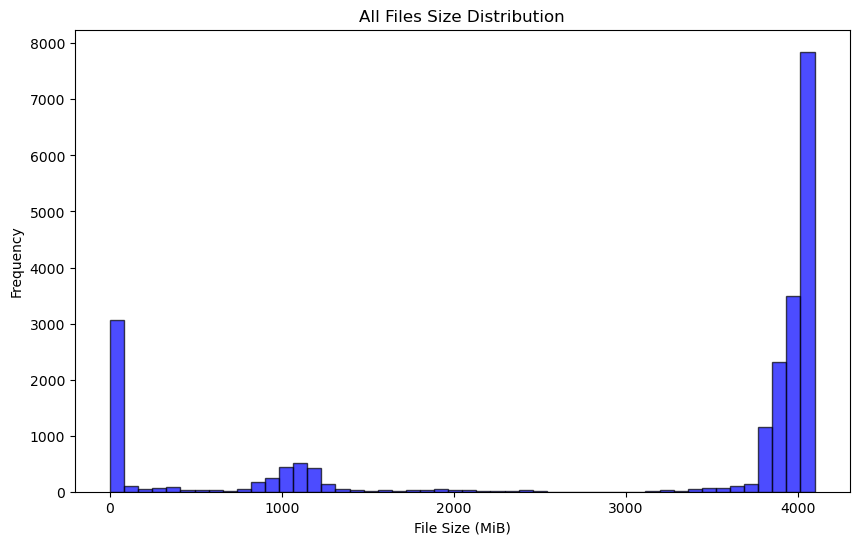

In [127]:
plt.figure(figsize=(10, 6))
plt.hist(df['FILE_SIZE']/1024**2, bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('All Files Size Distribution')
plt.xlabel('File Size (MiB)')
plt.ylabel('Frequency')
# plt.xlim(0, 10)
# plt.ylim(0, 200)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

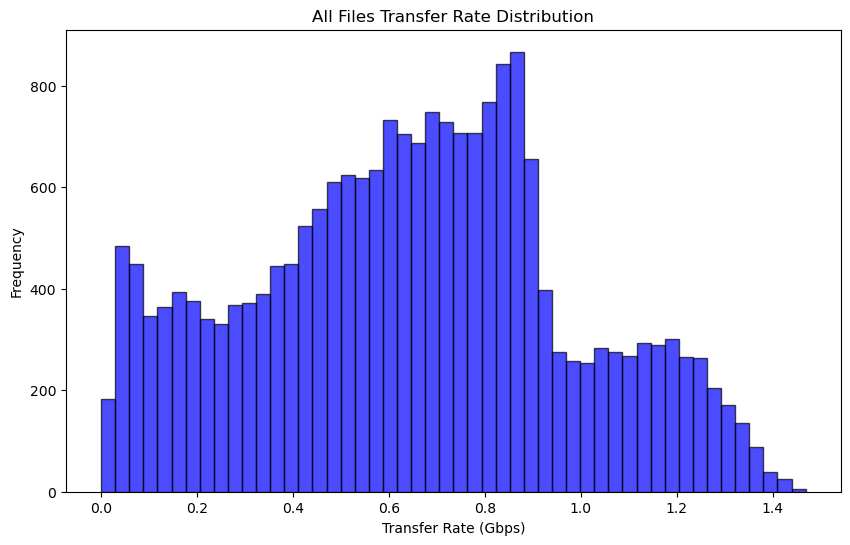

In [128]:
plt.figure(figsize=(10, 6))
plt.hist(df['TRANSFER_RATE'], bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('All Files Transfer Rate Distribution')
plt.xlabel('Transfer Rate (Gbps)')
plt.ylabel('Frequency')
# plt.xlim(0, 10)
# plt.ylim(0, 200)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

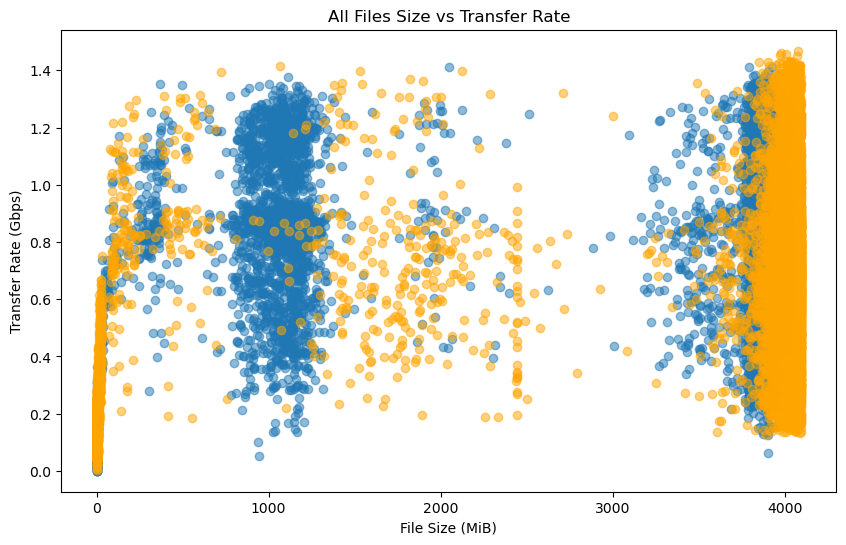

In [129]:
plt.figure(figsize=(10, 6))
plt.scatter(df[df['COMPRESSION_USED']]['FILE_SIZE'] / 1024**2, df[df['COMPRESSION_USED']]['TRANSFER_RATE'], alpha=0.5, colorizer='blue', label='With Compression')
plt.scatter(df[~df['COMPRESSION_USED']]['FILE_SIZE'] / 1024**2, df[~df['COMPRESSION_USED']]['TRANSFER_RATE'], alpha=0.5, color='orange', label='Without Compression')
plt.title('All Files Size vs Transfer Rate')
# plt.xlim(0,3000)
# plt.ylim(0, 15)
plt.xlabel('File Size (MiB)')
plt.ylabel('Transfer Rate (Gbps)')
plt.show()

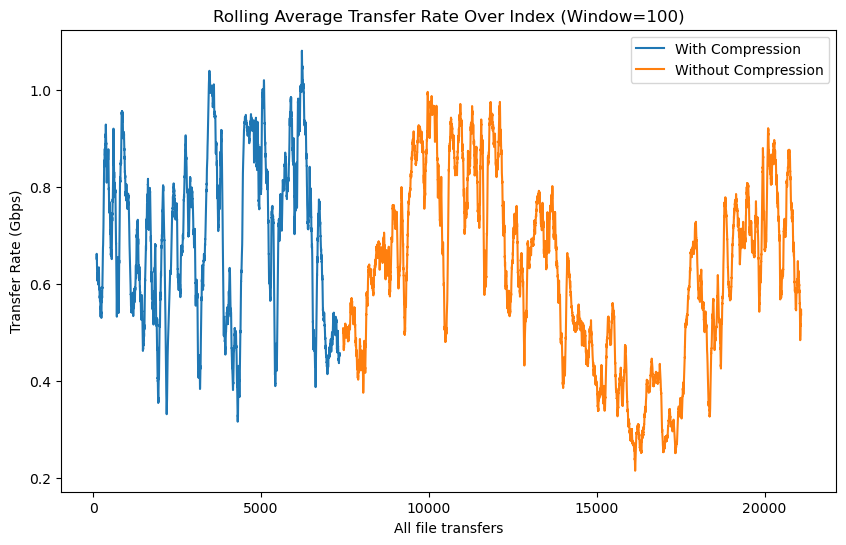

In [130]:
# Calculate the rolling average of the transfer rate over a window of 100
rolling_avg_comp = df[df['COMPRESSION_USED']]['TRANSFER_RATE'].rolling(window=100).mean()
rolling_avg_no_comp = df[~df['COMPRESSION_USED']]['TRANSFER_RATE'].rolling(window=100).mean()

# Plotting the rolling average transfer rate over the index
plt.figure(figsize=(10, 6))
plt.plot(rolling_avg_comp, label='With Compression')
plt.plot(rolling_avg_no_comp, label='Without Compression')
plt.title('Rolling Average Transfer Rate Over Index (Window=100)')
# plt.xlim(0,3000)
# plt.ylim(0, 15)
plt.xlabel('All file transfers')
plt.ylabel('Transfer Rate (Gbps)')
plt.legend()
plt.show()

In [131]:
df[~df['OVERLAP']]

,FILE_SIZE,BUCKET_NAME,FILES_PER_ZIP,UPLOAD_TIME,UPLOAD_START,UPLOAD_END,OVERLAP,TYPE,COMPRESSION_USED,TRANSFER_RATE
0,406322,LSST-IR-FUSION-Butlers-wide-comp,406,0.066638,2025-10-07 07:18:43.778950,2025-10-07 07:18:43.845588,False,zip,True,0.04543
2,1173227390,LSST-IR-FUSION-Butlers-wide-comp,20,13.629024,2025-10-07 07:20:35.317022,2025-10-07 07:20:48.946046,False,zip,True,0.641368
23,442889,LSST-IR-FUSION-Butlers-wide-comp,406,0.104309,2025-10-07 07:21:34.439151,2025-10-07 07:21:34.543460,False,zip,True,0.031635
24,1128225803,LSST-IR-FUSION-Butlers-wide-comp,27,7.911550,2025-10-07 07:22:49.642715,2025-10-07 07:22:57.554265,False,zip,True,1.062489
39,521717,LSST-IR-FUSION-Butlers-wide-comp,406,0.089510,2025-10-07 07:23:22.410159,2025-10-07 07:23:22.499669,False,zip,True,0.043426
...,...,...,...,...,...,...,...,...,...,...
21061,905449,LSST-IR-FUSION-Butlers-wide-nocomp,406,0.096829,2025-10-08 09:42:19.955839,2025-10-08 09:42:20.052668,False,zip,False,0.06967
21062,262377721,LSST-IR-FUSION-Butlers-wide-nocomp,406,2.375585,2025-10-08 09:42:23.383388,2025-10-08 09:42:25.758973,False,zip,False,0.822899
21064,97178034,LSST-IR-FUSION-Butlers-wide-nocomp,406,1.001839,2025-10-08 09:42:46.529450,2025-10-08 09:42:47.531289,False,zip,False,0.722704
21065,115796912,LSST-IR-FUSION-Butlers-wide-nocomp,406,1.075263,2025-10-08 09:43:05.854178,2025-10-08 09:43:06.929441,False,zip,False,0.802366


In [132]:
import numpy as np
from dask import dataframe as dd
from distributed import Client
client = Client()
print(client.dashboard_link)
df = df.sort_values(by='UPLOAD_START').reset_index(drop=True)
client.scatter(df)
print("sorted df")
print("from pandas df to dask ddf")
ddf = dd.from_pandas(df, npartitions=100)
# --- 1. Data Preparation ---
# Ensure datetime types for accurate calculations
# ddf['UPLOAD_START'] = dd.to_datetime(ddf['UPLOAD_START'])
# ddf['UPLOAD_END'] = dd.to_datetime(ddf['UPLOAD_END'])

# Sort by upload start time to process events chronologically
# --- 2. Create an Event Timeline ---
# Create a list of "events": the start and end of each transfer.
# At each start, the total network rate increases. At each end, it decreases.
def gen_events(row):
    events = []
    if pd.notna(row['TRANSFER_RATE']) and row['TRANSFER_RATE'] > 0:
        events.append({'time': row['UPLOAD_START'], 'rate_change': row['TRANSFER_RATE'], 'compression_used': row['COMPRESSION_USED']})
        events.append({'time': row['UPLOAD_END'], 'rate_change': -row['TRANSFER_RATE'], 'compression_used': row['COMPRESSION_USED']})
    # return pd.DataFrame(events).sort_values(by='time').reset_index(drop=True)
    return events

def process_partition(partition):
    # Apply the function to each row to get a list of lists of dictionaries
    list_of_events = partition.apply(gen_events, axis=1).sum()
    # If no events were generated in this partition, return an empty DataFrame
    if not list_of_events:
        return pd.DataFrame({
            'time': pd.Series(dtype='datetime64[ns]'),
            'rate_change': pd.Series(dtype='float64'),
            'compression_used': pd.Series(dtype='bool')
        })
    # Convert the list of events into a single DataFrame for the partition
    return pd.DataFrame(list_of_events)

events_ddf = ddf.map_partitions(
    process_partition,
    meta={'time': 'datetime64[ns]', 'rate_change': 'float64', 'compression_used': 'bool'}
).dropna().reset_index(drop=True)
print("set up events_ddf")
# Convert the list of events to a DataFrame and sort chronologically
events_df = events_ddf.compute().sort_values(by='time').reset_index(drop=True)
events_df['time'] = pd.to_datetime(events_df['time'])
print("computed events_df")
# --- 3. Calculate Throughput Over Time ---
# Iterate through the timeline, calculating the total data transferred during each interval
# between events. During each interval, the total transfer rate is constant.
total_data_transferred_gb = 0
total_data_transferred_gb_comp = 0
total_data_transferred_gb_no_comp = 0
current_rate_gbps = 0
print("starting loop over events_df")
for i in range(len(events_df) - 1):
    # Update the current total rate with the change from the current event
    current_rate_gbps += events_df.loc[i, 'rate_change']
    
    # Calculate the duration of the current interval (until the next event)
    start_interval = events_df.loc[i, 'time']
    end_interval = events_df.loc[i + 1, 'time']
    duration_seconds = (end_interval - start_interval).total_seconds()
    
    # If there is time between events, calculate data transferred and add to total
    if duration_seconds > 0:
        # Data = Rate (Gbps) * Time (s) -> gives Gigabits
        data_in_interval_gb = current_rate_gbps * duration_seconds
        if events_df.loc[i, 'compression_used']:
            total_data_transferred_gb_comp += data_in_interval_gb
        else:
            total_data_transferred_gb_no_comp += data_in_interval_gb
        total_data_transferred_gb += data_in_interval_gb

# --- 4. Calculate Final Results ---
# Total time from the first upload start to the last upload end
total_duration_seconds = (events_df['time'].max() - events_df['time'].min()).total_seconds()
total_duration_seconds_comp = (events_df[events_df['compression_used']]['time'].max() - events_df[events_df['compression_used']]['time'].min()).total_seconds()
total_duration_seconds_no_comp = (events_df[~events_df['compression_used']]['time'].max() - events_df[~events_df['compression_used']]['time'].min()).total_seconds()

# The overall average network speed is the total data transferred divided by the total time
if total_duration_seconds_comp > 0:
    estimated_total_speed_gbps_comp = total_data_transferred_gb_comp / total_duration_seconds_comp
else:
    estimated_total_speed_gbps_comp = 0
if total_duration_seconds_no_comp > 0:
    estimated_total_speed_gbps_no_comp = total_data_transferred_gb_no_comp / total_duration_seconds_no_comp
else:
    estimated_total_speed_gbps_no_comp = 0
if total_duration_seconds > 0:
    estimated_total_speed_gbps = total_data_transferred_gb / total_duration_seconds
else:
    estimated_total_speed_gbps = 0

print(f"Total duration of all transfers (with compression): {total_duration_seconds_comp:.2f} seconds")
print(f"Total data transferred (with compression, accounting for overlaps): {total_data_transferred_gb_comp / 8:.2f} GiB")
print(f"Estimated average total network speed (with compression): {estimated_total_speed_gbps_comp:.2f} Gbps")
print(f"Total duration of all transfers (without compression): {total_duration_seconds_no_comp:.2f} seconds")
print(f"Total data transferred (without compression, accounting for overlaps): {total_data_transferred_gb_no_comp / 8:.2f} GiB")
print(f"Estimated average total network speed (without compression): {estimated_total_speed_gbps_no_comp:.2f} Gbps")
print(f"Total duration of all transfers (with or without compression): {total_duration_seconds:.2f} seconds")
print(f"Total data transferred (with or without compression, accounting for overlaps): {total_data_transferred_gb / 8:.2f} GiB")
print(f"Estimated average total network speed (with or without compression): {estimated_total_speed_gbps:.2f} Gbps")

/home/dave/miniconda3/envs/lsst-uk/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 43469 instead
  warnings.warn(


http://127.0.0.1:43469/status
sorted df
from pandas df to dask ddf
set up events_ddf
computed events_df
starting loop over events_df
Total duration of all transfers (with compression): 50356.88 seconds
Total data transferred (with compression, accounting for overlaps): 17328.36 GiB
Estimated average total network speed (with compression): 2.75 Gbps
Total duration of all transfers (without compression): 43213.26 seconds
Total data transferred (without compression, accounting for overlaps): 44966.48 GiB
Estimated average total network speed (without compression): 8.32 Gbps
Total duration of all transfers (with or without compression): 95110.31 seconds
Total data transferred (with or without compression, accounting for overlaps): 62294.84 GiB
Estimated average total network speed (with or without compression): 5.24 Gbps


In [133]:
# Verify average
print(f"{(df[df['COMPRESSION_USED']]['UPLOAD_END'].max() - df[df['COMPRESSION_USED']]['UPLOAD_START'].min()).total_seconds():.2f} s, {df[df['COMPRESSION_USED']]['FILE_SIZE'].sum() / (1024**3):.2f} GiB, {df[df['COMPRESSION_USED']]['FILE_SIZE'].sum() * 8 / (1024**3) / ((df[df['COMPRESSION_USED']]['UPLOAD_END'].max() - df[df['COMPRESSION_USED']]['UPLOAD_START'].min()).total_seconds()):.2f} Gbps")
print(f"{(df[~df['COMPRESSION_USED']]['UPLOAD_END'].max() - df[~df['COMPRESSION_USED']]['UPLOAD_START'].min()).total_seconds():.2f} s, {df[~df['COMPRESSION_USED']]['FILE_SIZE'].sum() / (1024**3):.2f} GiB, {df[~df['COMPRESSION_USED']]['FILE_SIZE'].sum() * 8 / (1024**3) / ((df[~df['COMPRESSION_USED']]['UPLOAD_END'].max() - df[~df['COMPRESSION_USED']]['UPLOAD_START'].min()).total_seconds()):.2f} Gbps")
print(f"{(df['UPLOAD_END'].max() - df['UPLOAD_START'].min()).total_seconds():.2f} s, {df['FILE_SIZE'].sum() / (1024**3):.2f} GiB, {df['FILE_SIZE'].sum() * 8 / (1024**3) / ((df['UPLOAD_END'].max() - df['UPLOAD_START'].min()).total_seconds()):.2f} Gbps")

50356.88 s, 17328.36 GiB, 2.75 Gbps
43213.26 s, 44966.48 GiB, 8.32 Gbps
95110.31 s, 62294.84 GiB, 5.24 Gbps


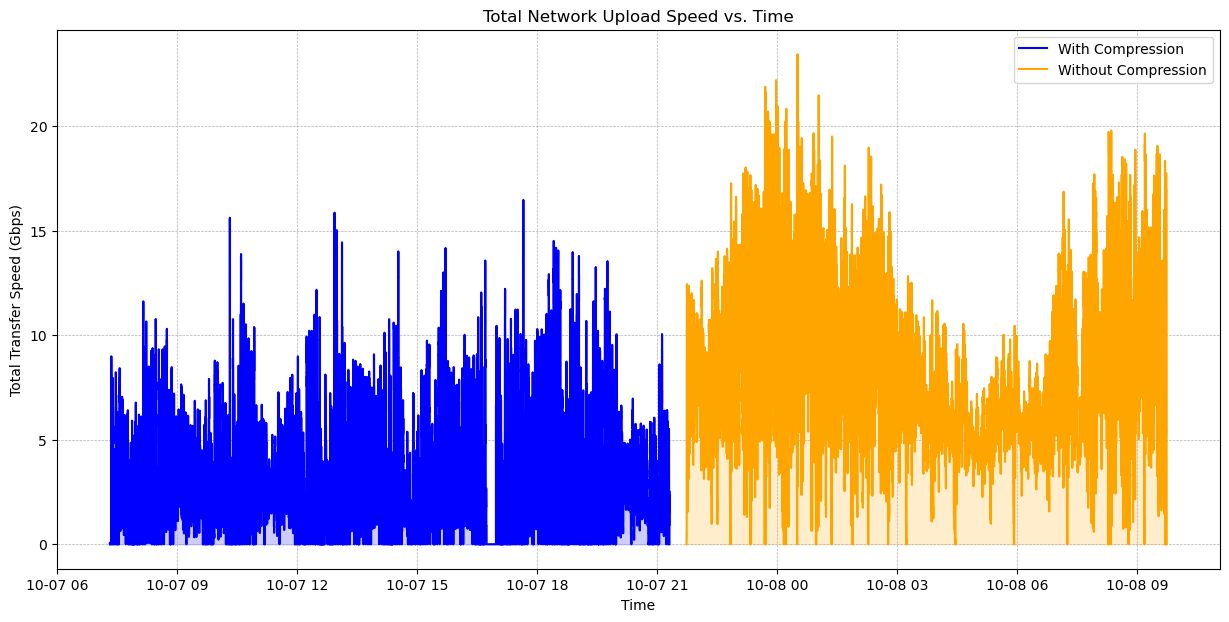

In [134]:
# --- 5. Plot Total Throughput Over Time by Compression ---

# Helper function to generate step plot data from an events dataframe
def prepare_step_plot_data(df):
    if df.empty:
        return [], []
    
    # Calculate the cumulative sum of rate changes to get the total network speed
    df['total_rate'] = df['rate_change'].cumsum()
    
    # Prepare data for a step plot
    times = []
    rates = []
    
    # Start the plot at a rate of 0 just before the first event
    times.append(df['time'].iloc[0])
    rates.append(0)
    
    for i in range(len(df) - 1):
        # Point at the beginning of the interval with the new rate
        times.append(df['time'].iloc[i])
        rates.append(df['total_rate'].iloc[i])
        # Point at the end of the interval with the same rate (creates the horizontal step)
        times.append(df['time'].iloc[i+1])
        rates.append(df['total_rate'].iloc[i])
        
    # Add the final point
    times.append(df['time'].iloc[-1])
    rates.append(df['total_rate'].iloc[-1])
    
    return times, rates

# Separate events by compression
comp_events_df = events_df[events_df['compression_used']].copy().reset_index(drop=True)
nocomp_events_df = events_df[~events_df['compression_used']].copy().reset_index(drop=True)

# Generate plot data for each case
comp_plot_times, comp_plot_rates = prepare_step_plot_data(comp_events_df)
nocomp_plot_times, nocomp_plot_rates = prepare_step_plot_data(nocomp_events_df)

# --- Plotting the data ---
plt.figure(figsize=(15, 7))

# Plot for "With Compression"
if comp_plot_times:
    plt.plot(comp_plot_times, comp_plot_rates, label='With Compression', color='blue')
    plt.fill_between(comp_plot_times, comp_plot_rates, alpha=0.2, color='blue')

# Plot for "Without Compression"
if nocomp_plot_times:
    plt.plot(nocomp_plot_times, nocomp_plot_rates, label='Without Compression', color='orange')
    plt.fill_between(nocomp_plot_times, nocomp_plot_rates, alpha=0.2, color='orange')

plt.title('Total Network Upload Speed vs. Time')
plt.xlabel('Time')
plt.ylabel('Total Transfer Speed (Gbps)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

In [135]:
events_df

,time,rate_change,compression_used
0,2025-10-07 07:18:43.773114,0.030543,True
1,2025-10-07 07:18:43.778950,0.045430,True
2,2025-10-07 07:18:43.845588,-0.045430,True
3,2025-10-07 07:18:43.874020,-0.030543,True
4,2025-10-07 07:20:35.317022,0.641368,True
...,...,...,...
42175,2025-10-08 09:43:48.664727,-0.681401,False
42176,2025-10-08 09:43:49.251337,-0.637393,False
42177,2025-10-08 09:43:49.861440,-0.679192,False
42178,2025-10-08 09:43:51.164752,-0.650068,False


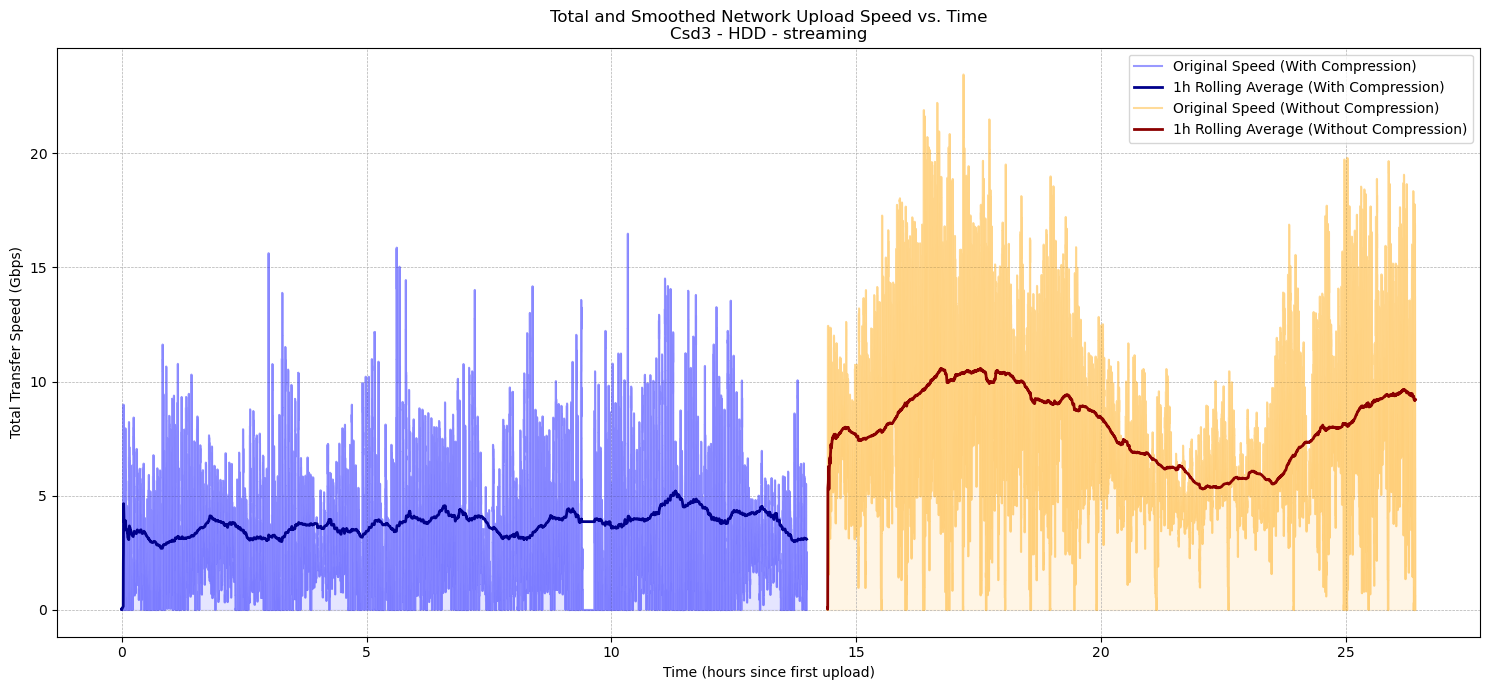

In [137]:
# --- 6. Plot Smoothed Throughput Over Time by Compression ---
import os

# To perform a time-based rolling average, we first set the 'time' column as the index for each dataset.
# The dataframes comp_events_df and nocomp_events_df were created in the previous cell.
comp_events_indexed_by_time = comp_events_df.set_index('time')
nocomp_events_indexed_by_time = nocomp_events_df.set_index('time')

# Calculate the rolling mean over a 1-hour window for both datasets.
smoothed_rate_comp = comp_events_indexed_by_time['total_rate'].rolling('1h').mean()
smoothed_rate_nocomp = nocomp_events_indexed_by_time['total_rate'].rolling('1h').mean()

# --- Convert x-axis from datetime to elapsed seconds for all plots ---
# Get the global start time of the first event
start_time = events_df['time'].min()

# Convert the datetime values for the original step plots to elapsed seconds
comp_plot_times_hours = [(t - start_time).total_seconds()/3600 for t in comp_plot_times]
nocomp_plot_times_hours = [(t - start_time).total_seconds()/3600 for t in nocomp_plot_times]

# Convert the datetime index of the smoothed data to elapsed seconds
smoothed_times_comp_hours = (smoothed_rate_comp.index - start_time).total_seconds() / 3600
smoothed_times_nocomp_hours = (smoothed_rate_nocomp.index - start_time).total_seconds() / 3600

# --- Plotting the original and smoothed data together ---
plt.figure(figsize=(15, 7))

# Plot for "With Compression"
if comp_plot_times:
    # Plot the original, "spiky" step plot
    plt.plot(comp_plot_times_hours, comp_plot_rates, label='Original Speed (With Compression)', alpha=0.4, color='blue')
    plt.fill_between(comp_plot_times_hours, comp_plot_rates, alpha=0.1, color='blue')
    # Plot the smoothed data
    plt.plot(smoothed_times_comp_hours, smoothed_rate_comp.values, label='1h Rolling Average (With Compression)', color='darkblue', linewidth=2)

# Plot for "Without Compression"
if nocomp_plot_times:
    # Plot the original, "spiky" step plot
    plt.plot(nocomp_plot_times_hours, nocomp_plot_rates, label='Original Speed (Without Compression)', alpha=0.4, color='orange')
    plt.fill_between(nocomp_plot_times_hours, nocomp_plot_rates, alpha=0.1, color='orange')
    # Plot the smoothed data
    plt.plot(smoothed_times_nocomp_hours, smoothed_rate_nocomp.values, label='1h Rolling Average (Without Compression)', color='darkred', linewidth=2)


plt.title(f'Total and Smoothed Network Upload Speed vs. Time\n{platform.capitalize()} - {storage.upper()} - {method}')
plt.xlabel('Time (hours since first upload)')
plt.ylabel('Total Transfer Speed (Gbps)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()

plt.savefig(os.path.expanduser(f'{base_path}/total_and_smoothed_network_upload_speed_{platform}_{storage}_{method}.png'))
plt.show()

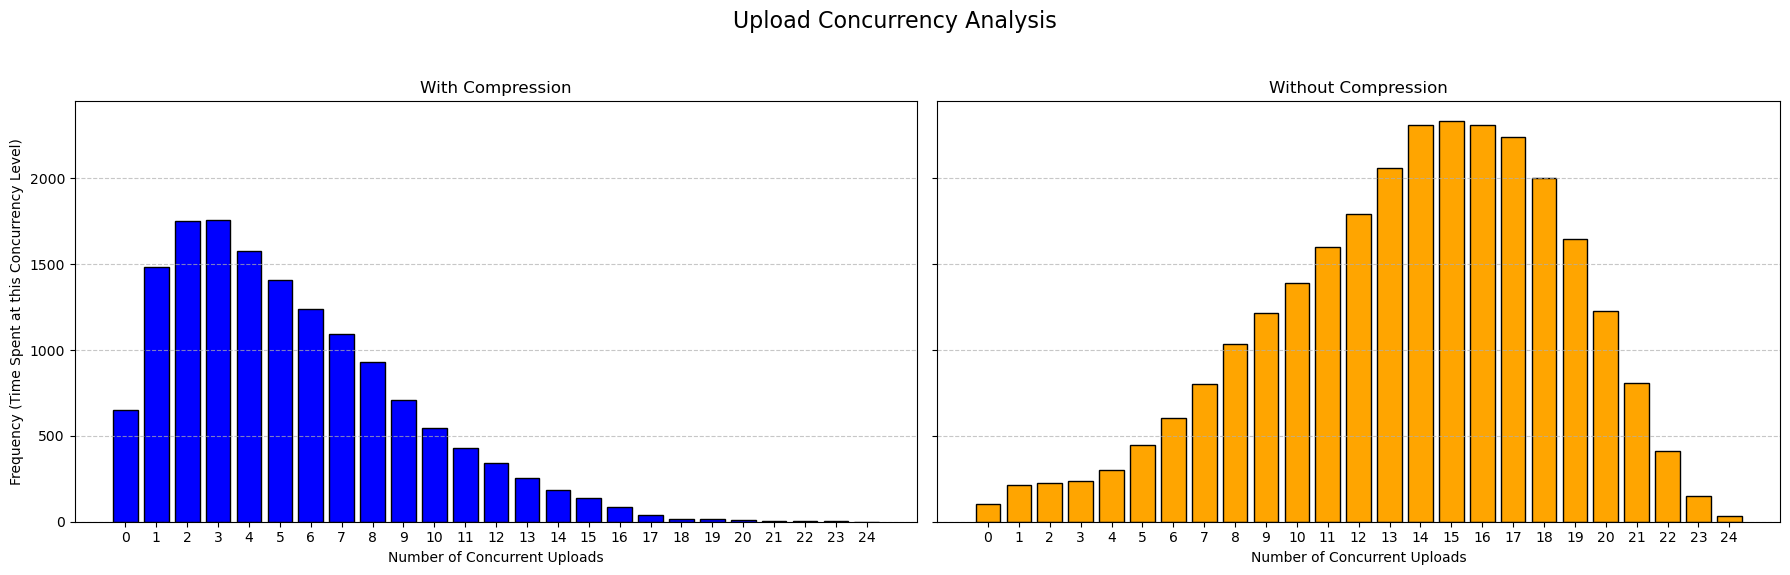

In [ ]:
# --- 7. Analyze and Plot Upload Concurrency by Compression ---

# Create a figure with two subplots, sharing the Y-axis for easier comparison
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)
fig.suptitle('Upload Concurrency Analysis', fontsize=16)

# --- Plot for "With Compression" ---
comp_events_df = events_df[events_df['compression_used'] == True].copy()
if not comp_events_df.empty:
    # Determine the change in concurrency at each event (+1 for start, -1 for end)
    comp_events_df['concurrency_change'] = comp_events_df['rate_change'].apply(lambda x: 1 if x > 0 else -1)
    # Calculate the cumulative sum to find the number of concurrent uploads at any given time
    comp_events_df['concurrency'] = comp_events_df['concurrency_change'].cumsum()

    # Plot a histogram of the concurrency counts
    max_concurrency_comp = int(comp_events_df['concurrency'].max())
    axes[0].hist(comp_events_df['concurrency'], bins=range(0, max_concurrency_comp + 2), align='left', rwidth=0.8, edgecolor='black', color='blue')
    axes[0].set_title('With Compression')
    axes[0].set_xlabel('Number of Concurrent Uploads')
    axes[0].set_ylabel('Frequency (Time Spent at this Concurrency Level)')
    axes[0].set_xticks(range(0, max_concurrency_comp + 1))
    axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# --- Plot for "Without Compression" ---
nocomp_events_df = events_df[events_df['compression_used'] == False].copy()
if not nocomp_events_df.empty:
    # Determine the change in concurrency at each event (+1 for start, -1 for end)
    nocomp_events_df['concurrency_change'] = nocomp_events_df['rate_change'].apply(lambda x: 1 if x > 0 else -1)
    # Calculate the cumulative sum to find the number of concurrent uploads at any given time
    nocomp_events_df['concurrency'] = nocomp_events_df['concurrency_change'].cumsum()

    # Plot a histogram of the concurrency counts
    max_concurrency_nocomp = int(nocomp_events_df['concurrency'].max())
    axes[1].hist(nocomp_events_df['concurrency'], bins=range(0, max_concurrency_nocomp + 2), align='left', rwidth=0.8, edgecolor='black', color='orange')
    axes[1].set_title('Without Compression')
    axes[1].set_xlabel('Number of Concurrent Uploads')
    axes[1].set_xticks(range(0, max_concurrency_nocomp + 1))
    axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for suptitle
plt.show()

In [ ]:
events_df

,time,rate_change,compression_used
0,2025-10-07 07:18:43.773114,0.030543,True
1,2025-10-07 07:18:43.778950,0.045430,True
2,2025-10-07 07:18:43.845588,-0.045430,True
3,2025-10-07 07:18:43.874020,-0.030543,True
4,2025-10-07 07:20:35.317022,0.641368,True
...,...,...,...
42175,2025-10-08 09:43:48.664727,-0.681401,False
42176,2025-10-08 09:43:49.251337,-0.637393,False
42177,2025-10-08 09:43:49.861440,-0.679192,False
42178,2025-10-08 09:43:51.164752,-0.650068,False
